<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#Validate-with-Epidish" data-toc-modified-id="Validate-with-Epidish-5">Validate with Epidish</a></span><ul class="toc-item"><li><span><a href="#Ridge-plots" data-toc-modified-id="Ridge-plots-5.1">Ridge plots</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(gridExtra)
library(grid)

# Functions

In [3]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/plotting_functions.R")

In [4]:
plot_ridge.fx <- function(mydf, var){  
    
    colors = structure(c("#d7191c", "#fdae61", "#abd9e9", "#2c7bb6"),
                       names = c("C1", "C2", "C3", "C4"))
    
    
   ridgeline.plot <- ggplot(mydf, aes(x = eval(parse(text = var)), y = immune_cluster, fill = immune_cluster)) +
  geom_density_ridges() +
theme(axis.line = element_line(color = "black"),
      axis.text = element_text(size = 22),
      axis.title = element_text(size = 22), 
      legend.position = "bottom",
      legend.key = element_rect(fill = "white", colour = "white")) +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent",
                                      colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(1.2,1,0,1),"cm"))  +
scale_fill_manual(values = colors) +
    labs(title = var, x = "z score immune cell type")
 
    return(ridgeline.plot)
    
}

# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [6]:
load(file = file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

In [7]:
table(metadata_IC$immune_cluster)


 C1  C2  C3  C4 
 90 279 393 163 

In [8]:
load( file = paste0(datapath, "TME_clusters/geneset_cc_norm.RData"))

# Validate with Epidish

In [9]:
icgc <- metadata_IC[metadata_IC$group == "ICGC",]

In [10]:
newcastle <- read.csv(paste0(datapath, "methyl_epidish/ICGC_epidish_Newcastle_signatures.csv"),
                             header = TRUE, check.names = F,
                             stringsAsFactors = FALSE)

In [11]:
colnames(newcastle)[1] <- "sample_id"

In [12]:
icgc_IC_methyl <- merge(icgc, newcastle, by = "sample_id")

In [13]:
dim(icgc_IC_methyl)

[1] 195  37

In [14]:
colnames(icgc_IC_methyl)

[1] "sample_id"        "aliquot_id"       "StromalScore"     "ImmuneScore"     
 [5] "ESTIMATEScore"    "name"             "case_id"          "gender"          
 [9] "ethnicity"        "race"             "age_at_diagnosis" "vital_status"    
[13] "days_to_death"    "days_to_progress" "recurrence"       "disease_type"    
[17] "primary_site"     "group"            "cohort"           "sample_type"     
[21] "age_class"        "tumour_subtype"   "CRI_cluster"      "immune_cluster"  
[25] "idat"             "Bcell"            "Cancer"           "CD4_Eff"         
[29] "CD8T"             "Endothelial"      "Eos"              "Glia"            
[33] "Mono"             "Neu"              "Neuron"           "NK"              
[37] "Treg"

In [15]:
icgc_IC_methyl$T_cells <- icgc_IC_methyl$CD4_Eff + icgc_IC_methyl$CD8T + icgc_IC_methyl$Treg

icgc_IC_methyl$Granulocytes <- icgc_IC_methyl$Neu + icgc_IC_methyl$Eos

In [16]:
pairwise.t.test(icgc_IC_methyl$T_cells, icgc_IC_methyl$immune_cluster, 
                p.adjust.method = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  icgc_IC_methyl$T_cells and icgc_IC_methyl$immune_cluster 

   C1               C2                   C3     
C2 0.00012          -                    -      
C3 0.00000000000027 < 0.0000000000000002 -      
C4 0.00000000007031 0.00000046963596     1.00000

P value adjustment method: bonferroni 

In [17]:
pairwise.t.test(icgc_IC_methyl$Bcell, icgc_IC_methyl$immune_cluster, 
                p.adjust.method = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  icgc_IC_methyl$Bcell and icgc_IC_methyl$immune_cluster 

   C1    C2                   C3   
C2 0.092 -                    -    
C3 1.000 < 0.0000000000000002 -    
C4 0.495 0.000000032          1.000

P value adjustment method: bonferroni 

In [18]:
pairwise.t.test(icgc_IC_methyl$NK, icgc_IC_methyl$immune_cluster, 
                p.adjust.method = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  icgc_IC_methyl$NK and icgc_IC_methyl$immune_cluster 

   C1      C2                   C3     
C2 1.00000 -                    -      
C3 0.00038 < 0.0000000000000002 -      
C4 0.00086 0.00000033           1.00000

P value adjustment method: bonferroni 

In [19]:
pairwise.t.test(icgc_IC_methyl$Mono, icgc_IC_methyl$immune_cluster, 
                p.adjust.method = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  icgc_IC_methyl$Mono and icgc_IC_methyl$immune_cluster 

   C1                  C2                   C3
C2 1                   -                    - 
C3 0.00000017541147145 < 0.0000000000000002 - 
C4 0.00000406923358355 0.00000000000000039  1 

P value adjustment method: bonferroni 

In [20]:
pairwise.t.test(icgc_IC_methyl$Granulocytes, icgc_IC_methyl$immune_cluster, 
                p.adjust.method = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  icgc_IC_methyl$Granulocytes and icgc_IC_methyl$immune_cluster 

   C1      C2                   C3     
C2 1.00000 -                    -      
C3 0.04983 < 0.0000000000000002 -      
C4 0.39142 0.00057              1.00000

P value adjustment method: bonferroni 

## Ridge plots

In [21]:
#scale for visualization
icgc_IC_methyl$T_cells_z <- scale(icgc_IC_methyl$T_cells)
icgc_IC_methyl$NK_z <- scale(icgc_IC_methyl$NK)
icgc_IC_methyl$B_cell_z <- scale(icgc_IC_methyl$Bcell)
icgc_IC_methyl$Granulocytes_z <- scale(icgc_IC_methyl$Granulocytes)
icgc_IC_methyl$Mono_z <- scale(icgc_IC_methyl$Mono)

In [22]:
ridgeplot_tcells <- plot_ridge.fx(icgc_IC_methyl, "T_cells_z")  

ridgeplot_NKcells <- plot_ridge.fx(icgc_IC_methyl, "NK_z")  

ridgeplot_bcells <- plot_ridge.fx(icgc_IC_methyl, "B_cell_z")  

ridgeplot_granulocytes <- plot_ridge.fx(icgc_IC_methyl, "Granulocytes_z")

ridgeplot_mono <- plot_ridge.fx(icgc_IC_methyl, "Mono_z")

Picking joint bandwidth of 0.283



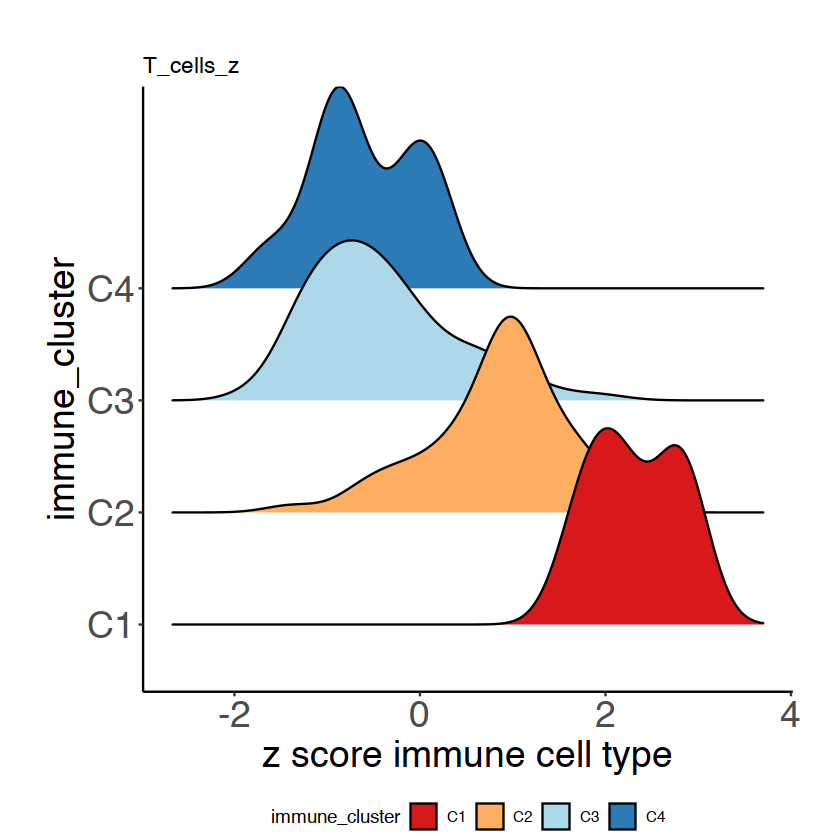

In [26]:
ridgeplot_tcells

In [24]:
pdf(paste0(plotpath, "IPD_clusters_epidish_ridgeplot.pdf"),
   width = 20, height = 10,
   useDingbats = FALSE)

grid.arrange(ridgeplot_tcells + xlim(c(-2,3)),
             ridgeplot_bcells + xlim(c(-2,3)), 
             ridgeplot_NKcells + xlim(c(-2,3)),
             ridgeplot_granulocytes + xlim(c(-2,3)),
             ridgeplot_mono + xlim(c(-2,3)),
             nrow=1)

dev.off()

Picking joint bandwidth of 0.283

Picking joint bandwidth of 0.211

Picking joint bandwidth of 0.298

Warning message:
“Removed 2 rows containing non-finite values (stat_density_ridges).”
Picking joint bandwidth of 0.207

Warning message:
“Removed 2 rows containing non-finite values (stat_density_ridges).”
Picking joint bandwidth of 0.136

Warning message:
“Removed 2 rows containing non-finite values (stat_density_ridges).”


pdf 
  2